In [44]:
import math as math
import numpy as np


def RMSE(x, y, theta0, thetas):

    n = len(x)
    tCost = 0

    for i in range(n):
        yhat = np.dot(thetas, x[i,:]) + theta0
        tCost = tCost + (yhat - y.iloc[i])**2
    cost = math.sqrt(tCost / n)

    return cost

0.02297906008004589


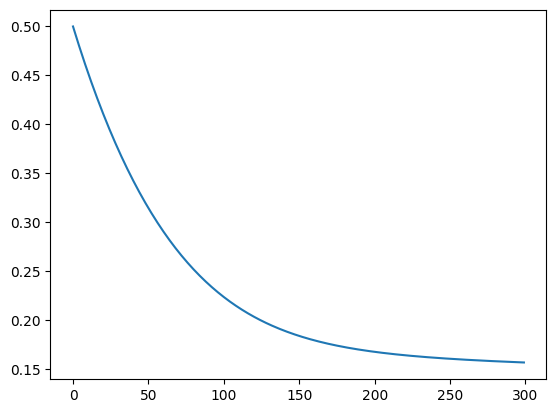

In [56]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn import datasets


df = pd.read_csv('Assignment 1 Export.csv', header=0, sep=',', quotechar='"', usecols=['INTPTLAT',	'INTPTLON',	'Children',	'Elderly',	'Poverty',	'Elevation',	'SeaLevelRise',	'Precipitation',	'Diabetes',	'MentalHealth'	,'Asthma'	,'Disability'	,'HousingQuality',	'Homeless'	,'LivAlone'	,'FloodHealthIndex'])
#df = pd.read_csv('Assignment 1 Export.csv', header=0, sep=',', quotechar='"', usecols=['INTPTLAT',	'INTPTLON',	'Children',	'Elderly',	'Poverty',	'Elevation',	'SeaLevelRise',	'Precipitation',	'Diabetes',	'MentalHealth'	,'Asthma'	,'Disability'	,'HousingQuality',	'Homeless'	,'LivAlone'	,'FloodHealthIndex_Quintiles'])

#inputs and outputs
dataX = df.drop('FloodHealthIndex', axis=1)
dataY = df['FloodHealthIndex']
test = []
errs = []

numFeatures = 15

#hyperparameters
TrainPercent = 0.7   # set percentage of data used in the training set [0-1]
iter=300
eta=0.005

#data splitting
split = round(len(dataX)*TrainPercent)
trainX = dataX[:split].to_numpy()
trainY = dataY[:split]
testX = dataX[split+1:].to_numpy()
testY = dataY[split+1:]


#initialize parameters as 0
theta0=0
thetas=np.zeros(15)
yhats = []
exportYhats = []

#each iteration
for j in range(iter):
  t0Grad=0;
  tGrads=np.zeros(15)

  #for each row
  for i in range(split):
    yhat = np.dot(trainX[i,:],thetas) + theta0 #find parameters
    t0Grad= t0Grad+ (yhat-trainY[i])


    #for each feature
    for k in range(numFeatures):
      tGrads[k] += (yhat-trainY[i])*trainX[i,k]


  errs.append(RMSE(trainX, trainY, theta0, thetas))
  test.append(RMSE(testX, testY, theta0, thetas))


  t0Grad = t0Grad / split
  tGrads = tGrads / split
  theta0 = theta0 - eta * t0Grad
  thetas -= eta * tGrads

for L in range(len(testX)):
    yhats.append(np.dot(testX[L,:],thetas) + theta0)

for M in range(len(dataX)):
    exportYhats.append(np.dot(dataX.iloc[M,:],thetas) + theta0)

df['prediction'] = exportYhats
df.to_csv('prediction.csv')


print(mean_squared_error(testY, yhats))
plt.plot(errs)
plt.show()

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = pd.read_csv('Assignment 1 Export.csv')


X = data[['INTPTLAT',	'INTPTLON',	'Children',	'Elderly',	'Poverty',	'Elevation',	'SeaLevelRise',	'Precipitation',	'Diabetes',	'MentalHealth'	,'Asthma'	,'Disability'	,'HousingQuality',	'Homeless'	,'LivAlone'	]]
y = data['FloodHealthIndex']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.005513910096674217
